# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

<IPython.core.display.Javascript object>


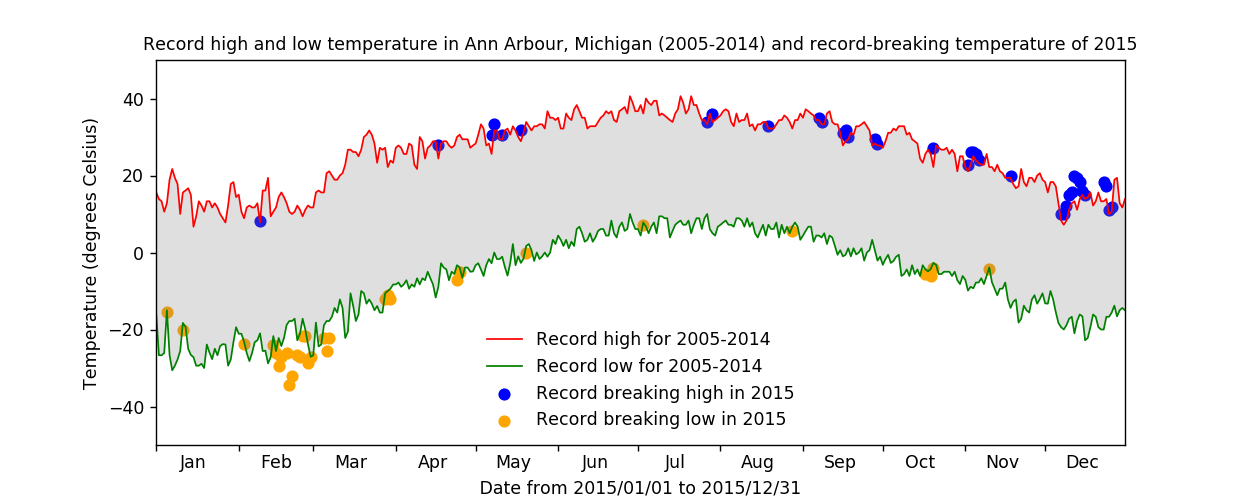

In [1]:
import pandas as pd
import numpy 
import matplotlib.pyplot as plt
import datetime
from matplotlib.ticker import FuncFormatter
from matplotlib.dates import MonthLocator, DateFormatter 
import matplotlib.dates as dates
import matplotlib.ticker as ticker

%matplotlib notebook

df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
df['Data_Value'] = df['Data_Value']*0.1
#print(df.head(10))


# For TMAX of 2015:
df_tmax_2015 = df[ (df['Element'] == 'TMAX') & df['Date'].apply(lambda x : x.startswith('2015'))]
df_tmax_2015 = df_tmax_2015.sort_values('Date')
df_tmax_2015 = df_tmax_2015.groupby(['Date']).max()
df_tmax_2015.index = pd.to_datetime(df_tmax_2015.index)
#print(df_tmax_2015.head(2))

# For TMIN of 2015:
df_tmin_2015 = df[ (df['Element'] == 'TMIN') & df['Date'].apply(lambda x : x.startswith('2015'))]
df_tmin_2015 = df_tmin_2015.sort_values('Date')
df_tmin_2015 = df_tmin_2015.groupby(['Date']).min()
df_tmin_2015.index = pd.to_datetime(df_tmin_2015.index)
#print(df_tmin_2015.head(2))



# For TMAX from 2005-2014:
df_tmax = df[ df['Element'] == 'TMAX' ]   
ind_drop = df_tmax[df_tmax['Date'].apply(lambda x: x.endswith('02-29'))].index
df_tmax = df_tmax.drop(ind_drop)
ind_drop = df_tmax[df_tmax['Date'].apply(lambda x: x.startswith('2015'))].index
df_tmax = df_tmax.drop(ind_drop)
#print(df_tmax[df_tmax['Date'] == '2015-02-29'])
df_tmax = df_tmax.sort_values('Date')

#Group by Date and take max value for each date
df_tmax = df_tmax.groupby(['Date']).max()
df_tmax.index = pd.to_datetime(df_tmax.index)
#If you want to -> Check values for a specific day and month of all years from 2005-2015
"""check_for_a_month_and_day = df_tmax.loc[(df_tmax.index.month==1) & (df_tmax.index.day==3), 'Data_Value']
print(check_for_a_month_and_day)"""

#Group by Date again
df_tmax = df_tmax.groupby([(df_tmax.index.month),(df_tmax.index.day)]).max()
#print(df_tmax.head(2))    #DONE FOR TMAX
tmax_date = df_tmax.index.values.tolist()
tmax_data_value = df_tmax['Data_Value'].tolist()
df_tmax.reset_index(drop=True, inplace=True)
#print(df_tmax.head(2))
df_tmax_2015['Data_Value_10_yrs'] = tmax_data_value
#print(df_tmax_2015.head(2))
record_high_2015 = df_tmax_2015[ df_tmax_2015['Data_Value_10_yrs'] < df_tmax_2015['Data_Value'] ]
#print(record_high_2015)


# For TMIN from 2005-2014:
df_tmin = df[ df['Element'] == 'TMIN' ]   
ind_drop = df_tmin[df_tmin['Date'].apply(lambda x: x.endswith('02-29'))].index
df_tmin = df_tmin.drop(ind_drop)
ind_drop = df_tmin[df_tmin['Date'].apply(lambda x: x.startswith('2015'))].index
df_tmin = df_tmin.drop(ind_drop)
#print(df_tmin[df_tmin['Date'] == '2015-02-02'])
df_tmin = df_tmin.sort_values('Date')

#Group by Date and take min value for each date
df_tmin = df_tmin.groupby(['Date']).min()
df_tmin.index = pd.to_datetime(df_tmin.index)
#If you want to -> Check values for a specific day and month of all years from 2005-2015
"""check_for_a_month_and_day = df_tmax.loc[(df_tmax.index.month==1) & (df_tmax.index.day==3), 'Data_Value']
print(check_for_a_month_and_day)"""

#Group by Date again
df_tmin = df_tmin.groupby([(df_tmin.index.month),(df_tmin.index.day)]).min()
#print(df_tmin)    #DONE FOR TMIN

tmin_date = df_tmin.index.values.tolist()
tmin_data_value = df_tmin['Data_Value'].tolist()
df_tmin.reset_index(drop=True, inplace=True)
#print(df_tmin.head(2))
df_tmin_2015['Data_Value_10_yrs'] = tmin_data_value
#print(df_tmin_2015.head(2))
record_low_2015 = df_tmin_2015[ df_tmin_2015['Data_Value_10_yrs'] > df_tmin_2015['Data_Value'] ]
#print(record_low_2015)



date_index = numpy.arange('2015-01-01','2016-01-01', dtype='datetime64[D]')
#plt.figure()
plt.figure(1, figsize=(10, 4))
plt.plot(date_index,df_tmax['Data_Value'],color='red', linewidth=1) # Max in red.
plt.plot(date_index,df_tmin['Data_Value'],color='green', linewidth=1) # Min in green.
# Overlay scatter plot for record breaking high and low Data Values in 2015
plt.scatter(record_high_2015.index, record_high_2015['Data_Value'], color='blue')
plt.scatter(record_low_2015.index, record_low_2015['Data_Value'], color='orange')

plt.gca().fill_between(date_index, df_tmax['Data_Value'], df_tmin['Data_Value'], facecolor='grey', alpha=0.25)
ax = plt.gca()
ax.axis(['2015/01/01','2015/12/31',-50,50])
plt.xlabel(' Date from 2015/01/01 to 2015/12/31 ', fontsize=10)
plt.ylabel('Temperature (degrees Celsius)', fontsize=10)
plt.title('Record high and low temperature in Ann Arbour, Michigan (2005-2014) and record-breaking temperature of 2015', fontsize=10)
plt.legend(['Record high for 2005-2014','Record low for 2005-2014','Record breaking high in 2015','Record breaking low in 2015'],loc=0,frameon=False)



# Where you locate the major and minor ticks:
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_minor_locator(dates.MonthLocator(bymonthday=15)) 

ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(dates.DateFormatter('%b'))
for tick in ax.xaxis.get_minor_ticks():
    tick.tick1line.set_markersize(0)
    tick.label1.set_horizontalalignment('center')

plt.savefig("Record_high_low.pdf")